### Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_regression

(500, 1)
(500,)


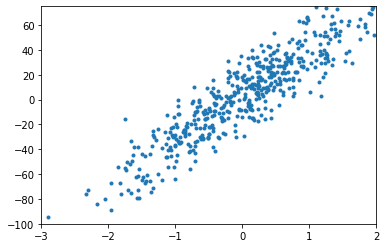

In [3]:
X, y = make_regression(n_samples=500, n_features=1, bias=4.2, noise=15)
print(X.shape)
print(y.shape)

plt.xlim(-3, 2)
plt.ylim(-100, 75)

plt.plot(X,y,'.')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 1) (400,)
(100, 1) (100,)


In [6]:
def hypothesis(x, W):
    x0 = 1
    x1 = x
    h = W[0]*x0 + W[1]*x1
    return h

In [7]:
def get_error(X, W, y_true):
    err = 0.0
    m = X.shape[0]
    for i in range(m):
        err += hypothesis(X[i], W) - y_true[i]**2
        
    err /= 2*m
    return err
        

In [8]:
def gradient_descent(X, W, y_true, alpha=0.1):
    m = X.shape[0]
    grad0 = 0.0
    grad1 = 0.0
    for i in range(m):
        grad0 += (y_true[i] - hypothesis(X[i], W)) *1
        grad1 += (y_true[i] - hypothesis(X[i], W)) *X[i]
        
    grad0 /= m
    grad1 /= m
    W[0] += alpha*grad0
    W[1] += alpha*grad1
    err = get_error(X, W, y_true)
    return W, err
    

In [9]:
W = np.array([0.1, 0.1])
loss =[]
for i in range(400):
    W, err = gradient_descent(X_train , W, y_train)
    loss.append(err)
print(W)


[ 3.41983645 36.16093983]


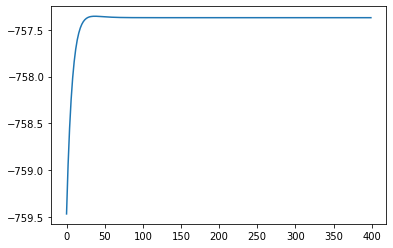

In [10]:
plt.plot(loss)
plt.show()

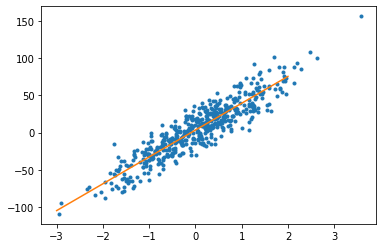

In [12]:
plt.plot(X, y, ".")
xh = np.arange(-3, 3)
yh = W[0] + W[1]*xh
plt.plot(xh, yh)
plt.show()

In [18]:
def stochastic_gd(X, W, y_true, alpha=0.1):
    m = X.shape[0]
    loss = []
    for i in range(m):
        grad0 = (y_true[i] - hypothesis(X[i] , W,)) * 1
        grad1 = (y_true[i] - hypothesis(X[i] , W,)) * X[i]
        W[0] += alpha * grad0
        W[1] += alpha * grad1
        err = get_error(X, W, y_true)
        loss.append(err)
        
    return W, loss

In [19]:
W = np.array([0.1, 0.1])
W, loss = stochastic_gd(X_train, W, y_train)
print(W)

[ 7.28965483 36.37337692]


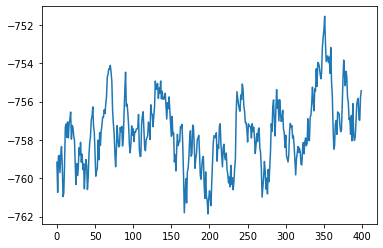

In [20]:
plt.plot(loss)
plt.show()

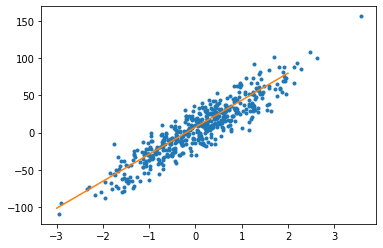

In [21]:
plt.plot(X, y, ".")
xh = np.arange(-3, 3)
yh = W[0] + W[1]*xh
plt.plot(xh, yh)
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7921193562061772

In [24]:
reg.coef_

array([36.16093983])

In [25]:
reg.intercept_

3.4198364516847333